You will be asked to perform some analyses on some macroeconomic data. The data files for the exercise are attached in Excel format. All data are extracted from the ECOS of the BOK (https://ecos.bok.or.kr). All the data are of monthly frequency. The contents of the data files are as follows. The first columns of all files are the months from 2000.1 to 2023.2. Some data are missing.

- BOKRates.xlsx: BOK base rate (한국은행 기준금리)
- GovBondYields.xlsx: Yields of treasury bonds (3 year) (3년 마기 국고채 수익률)
- CorporateBondYields.xlsx: Yields of corporate bonds (3 year, AA-), Yields of corporate bonds (3 year, BBB-)
- KOSPI_Index.xlsx: KOSPI Index (Monthly average, 1980.01 = 100)
- CurrentAccount: Balance of goods (상품수지)), Balance of services (서비스수지), Balance of primary income (본원소득수지), Balance of secondary income (이전소득수지), unit = million USD
- ExchangeRates: Won per one US dollar, Won per 100 Japanese Yen
- ForeignReserves: International reserves (외환보유고), unit = 1000 USD
- PriceIndexes: Consumer price index (소비자물가지수), House price index (주택매매가격지수)), House jeonse price index (주택전세가격지수)

You will need the following imports.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


## Q1. Import Data from the Excel files.

The data files do not have the names of variables in them. They only have dates (on the first column) and a bunch of numbers. You'd better make up the names for the variables to import, then read in the data with the names. It is desirable that the variables names refect the contents. 

In [135]:
# your code here
df1 = pd.read_excel("BOKRates.xlsx", names=["Month","B_Rate"], header=None)
df2 = pd.read_excel("GovBondYields.xlsx", names=["Month","GBY"], header=None)
df3 = pd.read_excel("CorporateBondYields.xlsx", names=["Month","CBY_A", "CBY_B"], header=None)
df4 = pd.read_excel("KOSPI_Index.xlsx", names=["Month","KOSPI"], header=None)
df5 = pd.read_excel("CurrentAccount.xlsx", names=["Month","BOG","BOS","BOPI","BOSI"], header=None)
df6 = pd.read_excel("ExchangeRates.xlsx", names=["Month","Won_Dollar","Won_Yen"], header=None)
df7 = pd.read_excel("ForeignReserves.xlsx", names=["Month","FR"], header=None)
df8 = pd.read_excel("PriceIndexes.xlsx", names=["Month","CPI","HPI","HJPI"], header=None)

## Q2. Merge and delete dataframes


#### Q2-1. Merge all the separate dataframes that you loaded above into a large dataframe.


In [136]:
# your code here
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]
for i in range(len(df_list)):
    if i == 0:
        df = df1
        continue
    df = pd.merge(df,df_list[i],on="Month")
df

,Month,B_Rate,GBY,CBY_A,CBY_B,KOSPI,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,FR,CPI,HPI,HJPI
0,2000/01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,76999820,62.456,38.995,37.418
1,2000/02,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,1030.93,79726833,62.647,39.161,38.501
2,2000/03,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,83648210,62.962,39.327,39.368
3,2000/04,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,84612868,62.709,39.368,39.874
4,2000/05,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,86819839,62.393,39.327,39.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2022/10,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,414005699,109.210,100.014,100.264
274,2022/11,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,416104905,109.100,98.909,98.829
275,2022/12,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,959.12,423163664,109.280,97.894,97.279
276,2023/01,3.50,3.460,4.704,10.788,2362.36,-3390.4,-2513.3,6335.4,-161.5,1247.25,956.76,429967671,110.100,96.612,95.350


#### Q2-2. The dataframes that you loaded from excel files in Q1 will not be used any more. Delete them from memory (Do not delete Excel files on your computer!!!).

In [137]:
# your code here
del df1, df2, df3, df4, df5, df6, df7, df8, df_list

## Q3. Convert data type and set index


#### Q3-1. Do the following

- Check with the data types of the variables. The data type of the first column (the months) must be currently `object`. 
- Convert the type of the first column into `pandas datetime`. You may refer to https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 


In [138]:
# your code here

# Check with the data types of the variables. The data type of the first column (the months) must be currently object.
df.dtypes

Month          object
B_Rate        float64
GBY           float64
CBY_A         float64
CBY_B         float64
KOSPI         float64
BOG           float64
BOS           float64
BOPI          float64
BOSI          float64
Won_Dollar    float64
Won_Yen       float64
FR              int64
CPI           float64
HPI           float64
HJPI          float64
dtype: object

In [139]:
# your code here

# Convert the type of the first column into pandas datetime
df["Month"] = pd.to_datetime(df["Month"])
df

,Month,B_Rate,GBY,CBY_A,CBY_B,KOSPI,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,FR,CPI,HPI,HJPI
0,2000-01-01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,76999820,62.456,38.995,37.418
1,2000-02-01,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,1030.93,79726833,62.647,39.161,38.501
2,2000-03-01,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,83648210,62.962,39.327,39.368
3,2000-04-01,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,84612868,62.709,39.368,39.874
4,2000-05-01,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,86819839,62.393,39.327,39.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2022-10-01,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,414005699,109.210,100.014,100.264
274,2022-11-01,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,416104905,109.100,98.909,98.829
275,2022-12-01,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,959.12,423163664,109.280,97.894,97.279
276,2023-01-01,3.50,3.460,4.704,10.788,2362.36,-3390.4,-2513.3,6335.4,-161.5,1247.25,956.76,429967671,110.100,96.612,95.350


#### Q3-2. Set the converted column as the index of the dataframe.

In [140]:
# your code here
df.set_index("Month", inplace=True)
df

,B_Rate,GBY,CBY_A,CBY_B,KOSPI,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,FR,CPI,HPI,HJPI
Month,,,,,,,,,,,,,,,
2000-01-01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,76999820,62.456,38.995,37.418
2000-02-01,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,1030.93,79726833,62.647,39.161,38.501
2000-03-01,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,83648210,62.962,39.327,39.368
2000-04-01,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,84612868,62.709,39.368,39.874
2000-05-01,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,86819839,62.393,39.327,39.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,414005699,109.210,100.014,100.264
2022-11-01,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,416104905,109.100,98.909,98.829
2022-12-01,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,959.12,423163664,109.280,97.894,97.279


## Q4. Create new variables and delete some exisitng variables

#### Q4-1. Create the following new variables (columns) using existing variables.

- Creadit spread: the difference in yields between corporate bonds with high risk and low risk
- Monthly percentage change in KOSPI index
- Current account: some of balances of goods, services, primary income and secondary income
- Monthly change in the foreign reserves
- YoY Inflation rate for consumer price index: percentage change in the consumer price index compared to the month in the previous year (전년동월대비 소지비물가지수 상승율)
- YoY Inflation rate for house price index: percentage change in the house price index compared to the month in the previous year (전년동월대비 주택매매가격지수 상승율)
- YoY Inflation rate for jeonse price index: percentage change in the jeonse price index compared to the month in the previous year (전년동월대비 주택전세가격지수 상승율)


In [141]:
# your code here

# Credit Spread
df["CS"] = abs(df["CBY_B"]-df["CBY_A"])

# Monthly percentage change in KOSPI index
df["KOSPI_change"] = df["KOSPI"].pct_change() * 100

# Current account
df["CA"] = df["BOG"] + df["BOS"] + df["BOPI"] + df["BOSI"]

# Monthly change in the foreign reserves
df["FR_change"] = df["FR"].diff()

# YoY Inflation rate for consumer price index
df["YoY_CPI"] = df["CPI"].pct_change(periods=12) * 100

# YoY Inflation rate for house price index
df["YoY_HPI"] = df["HPI"].pct_change(periods=12) * 100

# YoY Inflation rate for jeonse price index
df["YoY_HJPI"] = df["HJPI"].pct_change(periods=12) * 100

df

,B_Rate,GBY,CBY_A,CBY_B,KOSPI,BOG,BOS,BOPI,BOSI,Won_Dollar,...,CPI,HPI,HJPI,CS,KOSPI_change,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.75,9.280,10.250,NaN,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,...,62.456,38.995,37.418,NaN,NaN,1643.2,NaN,NaN,NaN,NaN
2000-02-01,5.00,8.990,10.010,NaN,902.73,534.6,73.0,-391.1,42.2,1128.80,...,62.647,39.161,38.501,NaN,NaN,258.7,2727013.0,NaN,NaN,NaN
2000-03-01,5.00,9.060,10.000,NaN,878.38,733.5,-35.4,-327.3,-28.7,1117.19,...,62.962,39.327,39.368,NaN,-2.697374,342.1,3921377.0,NaN,NaN,NaN
2000-04-01,5.00,8.950,9.970,NaN,779.75,-39.3,-130.1,-472.8,-3.6,1109.76,...,62.709,39.368,39.874,NaN,-11.228625,-645.8,964658.0,NaN,NaN,NaN
2000-05-01,5.00,8.960,9.910,NaN,720.77,1346.5,-185.3,-185.0,-13.6,1120.01,...,62.393,39.327,39.910,NaN,-7.563963,962.6,2206971.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.00,4.235,5.436,11.288,2230.27,-2326.3,-727.3,2179.7,-57.4,1426.66,...,109.210,100.014,100.264,5.852,-4.441436,-931.3,-2760953.0,5.670053,1.909517,1.709289
2022-11-01,3.25,3.895,5.487,11.331,2417.56,-1512.5,-813.3,1886.9,-152.3,1364.10,...,109.100,98.909,98.829,5.844,8.397638,-591.2,2099206.0,5.035140,-0.317464,-0.475323
2022-12-01,3.25,3.630,5.302,11.173,2361.28,310.9,-563.0,2516.9,18.2,1296.22,...,109.280,97.894,97.279,5.871,-2.327967,2283.0,7058759.0,5.036524,-1.831127,-2.455679


#### Q4-2. Delete the following unnecssary variables and show summary statistics of the dataset.

- KOSPI index, consumer price index, house price index, house jeonse price index, foreign reserves

In [142]:
# your code here
df.drop("KOSPI", axis=1, inplace=True)
df.drop("CPI", axis=1, inplace=True)
df.drop("HPI", axis=1, inplace=True)
df.drop("HJPI", axis=1, inplace=True)
df.drop("FR", axis=1, inplace=True)
df

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,CS,KOSPI_change,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI
Month,,,,,,,,,,,,,,,,,
2000-01-01,4.75,9.280,10.250,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,NaN,NaN,1643.2,NaN,NaN,NaN,NaN
2000-02-01,5.00,8.990,10.010,NaN,534.6,73.0,-391.1,42.2,1128.80,1030.93,NaN,NaN,258.7,2727013.0,NaN,NaN,NaN
2000-03-01,5.00,9.060,10.000,NaN,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,NaN,-2.697374,342.1,3921377.0,NaN,NaN,NaN
2000-04-01,5.00,8.950,9.970,NaN,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,NaN,-11.228625,-645.8,964658.0,NaN,NaN,NaN
2000-05-01,5.00,8.960,9.910,NaN,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,NaN,-7.563963,962.6,2206971.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.00,4.235,5.436,11.288,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,5.852,-4.441436,-931.3,-2760953.0,5.670053,1.909517,1.709289
2022-11-01,3.25,3.895,5.487,11.331,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,5.844,8.397638,-591.2,2099206.0,5.035140,-0.317464,-0.475323
2022-12-01,3.25,3.630,5.302,11.173,310.9,-563.0,2516.9,18.2,1296.22,959.12,5.871,-2.327967,2283.0,7058759.0,5.036524,-1.831127,-2.455679


## Q5. Count the number of observarions for the following


#### Q5-1. the number of periods when the BOK base rate was higher than its mean

In [143]:
# your code here
(df["B_Rate"] > df["B_Rate"].mean()).sum()

132

#### Q5-2. the number of periods when the CIP inflation rate was higher than its mean

In [144]:
# your code here
(df["YoY_CPI"] > df["YoY_CPI"].mean()).sum()

128

#### Q5-3. the number of periods when the house price inflation rate was higher than CPI inflation rate

In [145]:
# your code here
(df["YoY_HPI"] > df["YoY_CPI"]).sum()

163

#### Q5-4. the number of periods when the US Dollar was more valuable than the Japanse Yen

In [146]:
# your code here

# Won per one US dollar > Won per 100 Japanese Yen
(df["Won_Dollar"] > df["Won_Yen"]).sum()

217

#### Q5-5. the number of periods when Korea ran a surplus in current account 

In [147]:
# your code here

# ran a surplus in current account: current account > 0
(df["CA"] > 0).sum()

236

## Q6. Plot the following variables

- BOK base rate, government bond yields, corporate bond yields (AA-) in a graph
- Corporate bond yields (both AA- and BBB-) and the credit spread in a graph
- Current account and its components in a graph
- Current account and the monthly changes in foreign reserves (remark: The units of these two variables are different. Bear this in mind when you make the plot.)
- Exchange rates of USD and JPY in a graph
- Inflation rates of consumer price index, house price index, house jeonse price index in a graph

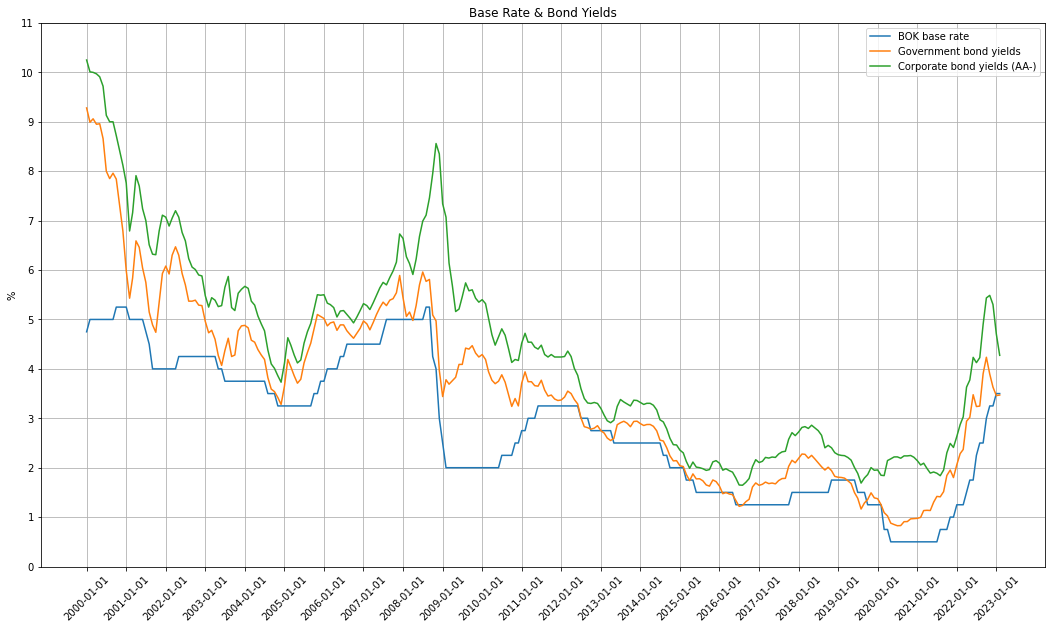

In [148]:
# your code here

# BOK base rate, government bond yields, corporate bond yields (AA-) in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["B_Rate","GBY","CBY_A"]], label=["BOK base rate","Government bond yields","Corporate bond yields (AA-)"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(0,12)])
plt.ylabel('%')
plt.title('Base Rate & Bond Yields')
plt.legend()
plt.grid(True)

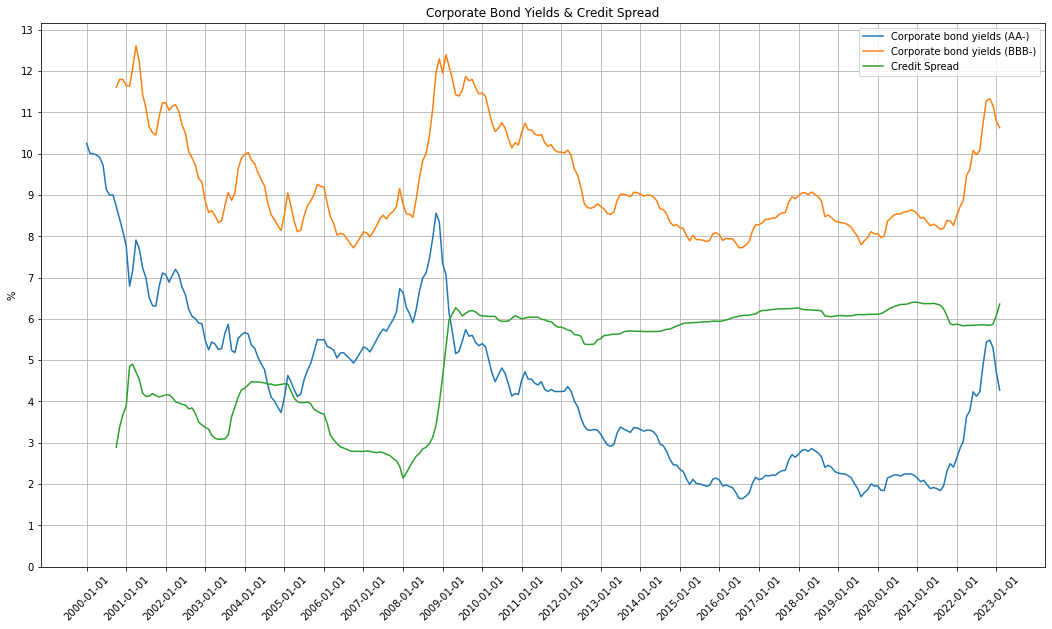

In [149]:
# your code here

# Corporate bond yields (both AA- and BBB-) and the credit spread in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["CBY_A","CBY_B","CS"]], label=["Corporate bond yields (AA-)","Corporate bond yields (BBB-)","Credit Spread"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(0,14)])
plt.ylabel('%')
plt.title('Corporate Bond Yields & Credit Spread')
plt.legend()
plt.grid(True)

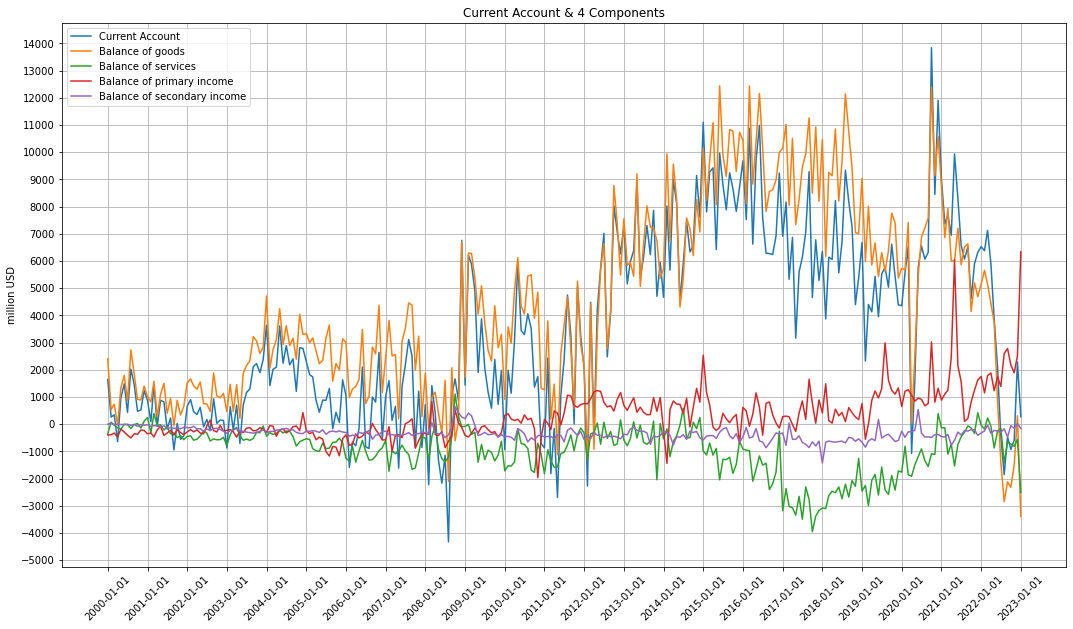

In [150]:
# your code here

# Current account and its components in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["CA","BOG","BOS","BOPI","BOSI"]], label=["Current Account","Balance of goods","Balance of services","Balance of primary income","Balance of secondary income"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-5000,15000,1000)])
plt.ylabel('million USD')
plt.title('Current Account & 4 Components')
plt.legend()
plt.grid(True)

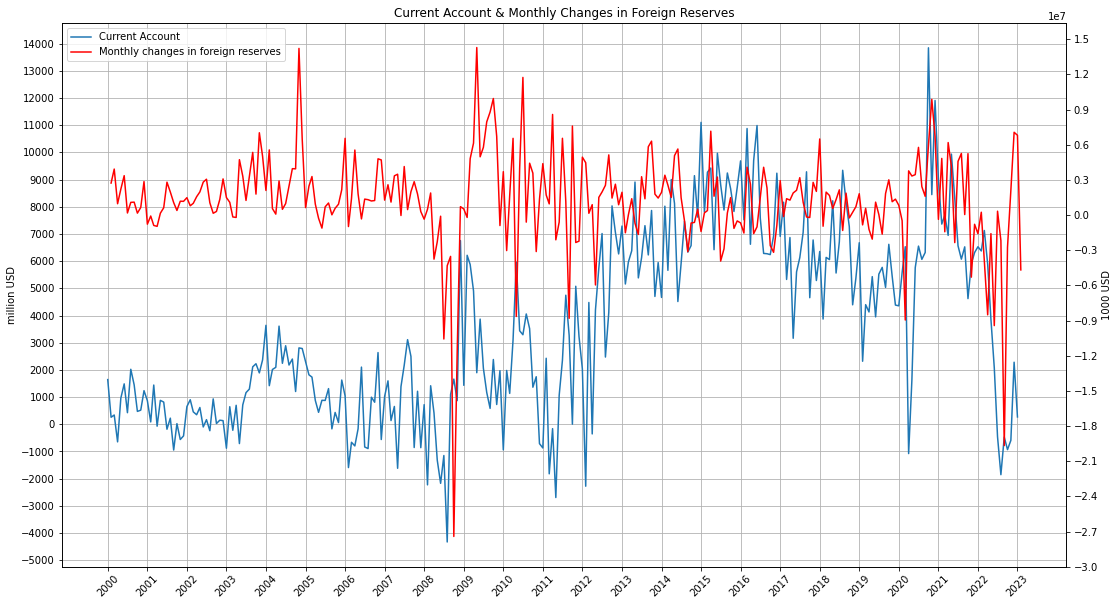

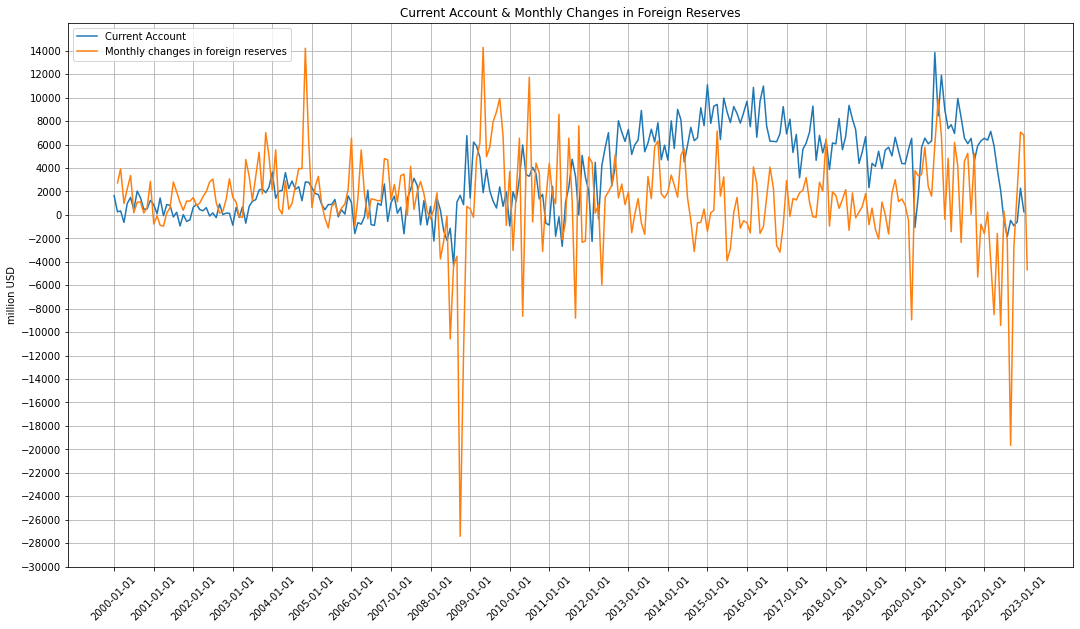

In [151]:
# your code here

# Current account 단위는 million USD인 반면 Foreign Reserve 단위는 1000 USD
# 1. 이중 Y축의 graph
fig, ax = plt.subplots(figsize=(18,10))

# Current account
line1 = ax.plot(df["CA"], label="Current Account")
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-5000,15000,1000)])
plt.ylabel('million USD')

# the monthly changes in foreign reserves
ax2 = ax.twinx()
line2 = ax2.plot(df['FR_change'], label="Monthly changes in foreign reserves", color='r')
plt.yticks([i for i in range(-3 * 10**7,17 * 10**6, 3 * 10**6)])
plt.ylabel('1000 USD')

# Add a title and legend
plt.title('Current Account & Monthly Changes in Foreign Reserves')
lines = line1 + line2
labels = [line.get_label() for line in lines]
ax.legend(lines, labels)
ax.grid(True)
plt.show()

# 2. Foreign Reserves 단위를 million USD로 맞춘 graph
df["temp_FR_change"] = df["FR_change"] / 1000
plt.figure(figsize=(18, 10))
plt.plot(df[["CA","temp_FR_change"]], label=["Current Account","Monthly changes in foreign reserves"])
df.drop("temp_FR_change", axis=1, inplace=True)
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-30000,16000,2000)])
plt.ylabel('million USD')
plt.title('Current Account & Monthly Changes in Foreign Reserves')
plt.legend()
plt.grid(True)

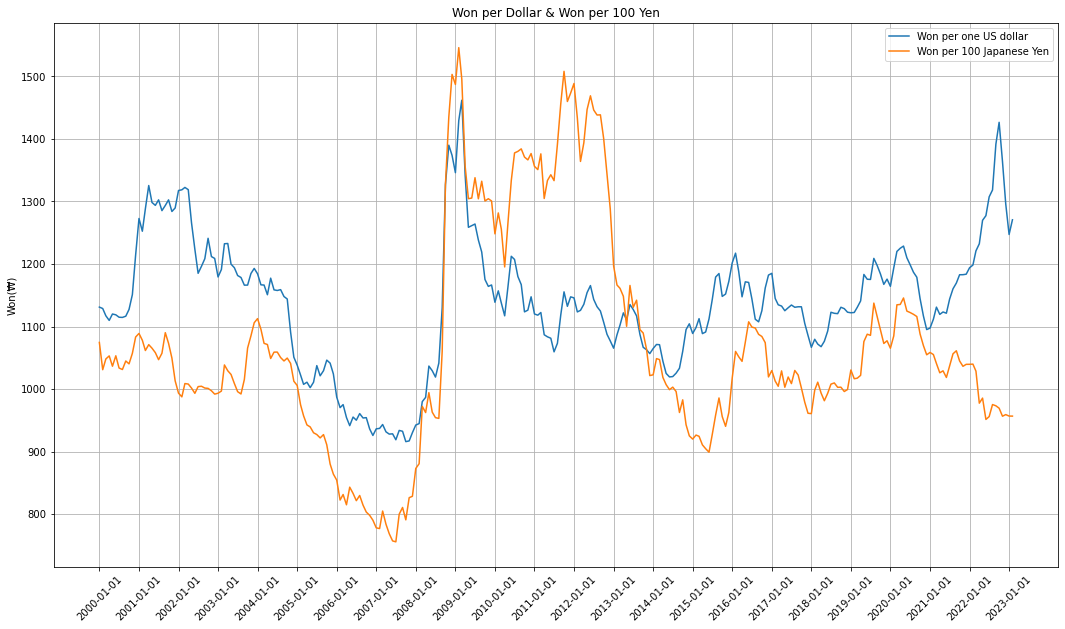

In [152]:
# your code here

# Exchange rates of USD and JPY in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["Won_Dollar","Won_Yen"]], label=["Won per one US dollar", "Won per 100 Japanese Yen"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.ylabel("Won(₩)")
plt.title('Won per Dollar & Won per 100 Yen')
plt.legend()
plt.grid(True)

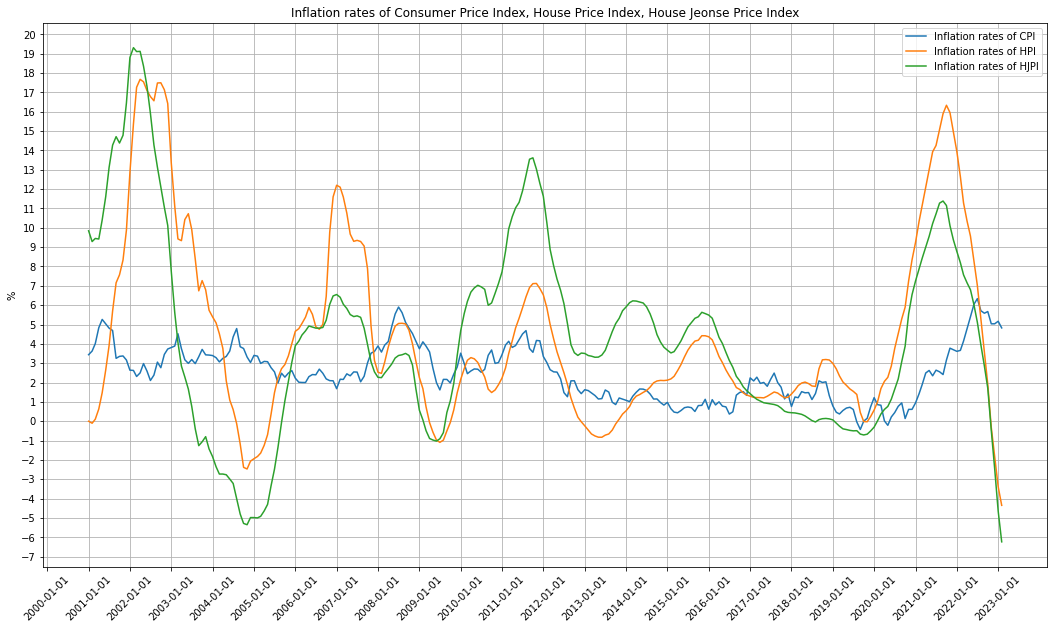

In [153]:
# your code here

# Inflation rates of consumer price index, house price index, house jeonse price index in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["YoY_CPI","YoY_HPI","YoY_HJPI"]], label=["Inflation rates of CPI","Inflation rates of HPI","Inflation rates of HJPI"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-7,21)])
plt.ylabel('%')
plt.title('Inflation rates of Consumer Price Index, House Price Index, House Jeonse Price Index')
plt.legend()
plt.grid(True)

## Q7. Smoothe time series variables

As you might have seen above, the time series of current account and its components are fluctuating very much month by month, hence their plots look very noisy. You might want to smoothe those variables. 


#### Q7-1. Create new variables by taking the 12 month rolling means on balances of goods, services, primary income, secondary income and current account. For this, refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html


In [154]:
# your code here

# 12 month rolling means on balances of goods: minimum of periods is 1
df["BOG_roll"] = df["BOG"].rolling(window=12, min_periods=1).mean()

# 12 month rolling means on balances of services: minimum of periods is 1
df["BOS_roll"] = df["BOS"].rolling(window=12, min_periods=1).mean()

# 12 month rolling means on balances of primary income: minimum of periods is 1
df["BOPI_roll"] = df["BOPI"].rolling(window=12, min_periods=1).mean()

# 12 month rolling means on balances of secondary income: minimum of periods is 1
df["BOSI_roll"] = df["BOSI"].rolling(window=12, min_periods=1).mean()

# current account that is the total of the above new variables
df["CA_roll"] = df["BOG_roll"] + df["BOS_roll"] + df["BOPI_roll"] + df["BOSI_roll"]

df

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,...,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI,BOG_roll,BOS_roll,BOPI_roll,BOSI_roll,CA_roll
Month,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.75,9.280,10.250,NaN,2399.5,-355.6,-396.3,-4.4,1131.07,1074.52,...,1643.2,NaN,NaN,NaN,NaN,2399.500000,-355.600000,-396.300000,-4.400000,1643.200000
2000-02-01,5.00,8.990,10.010,NaN,534.6,73.0,-391.1,42.2,1128.80,1030.93,...,258.7,2727013.0,NaN,NaN,NaN,1467.050000,-141.300000,-393.700000,18.900000,950.950000
2000-03-01,5.00,9.060,10.000,NaN,733.5,-35.4,-327.3,-28.7,1117.19,1048.11,...,342.1,3921377.0,NaN,NaN,NaN,1222.533333,-106.000000,-371.566667,3.033333,748.000000
2000-04-01,5.00,8.950,9.970,NaN,-39.3,-130.1,-472.8,-3.6,1109.76,1052.99,...,-645.8,964658.0,NaN,NaN,NaN,907.075000,-112.025000,-396.875000,1.375000,399.550000
2000-05-01,5.00,8.960,9.910,NaN,1346.5,-185.3,-185.0,-13.6,1120.01,1036.50,...,962.6,2206971.0,NaN,NaN,NaN,994.960000,-126.680000,-354.500000,-1.620000,512.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,3.00,4.235,5.436,11.288,-2326.3,-727.3,2179.7,-57.4,1426.66,969.36,...,-931.3,-2760953.0,5.670053,1.909517,1.709289,2178.558333,-341.308333,1779.683333,-254.100000,3362.833333
2022-11-01,3.25,3.895,5.487,11.331,-1512.5,-813.3,1886.9,-152.3,1364.10,956.51,...,-591.2,2099206.0,5.035140,-0.317464,-0.475323,1619.533333,-380.600000,1832.366667,-249.575000,2821.725000
2022-12-01,3.25,3.630,5.302,11.173,310.9,-563.0,2516.9,18.2,1296.22,959.12,...,2283.0,7058759.0,5.036524,-1.831127,-2.455679,1255.066667,-462.308333,1907.025000,-213.908333,2485.875000


#### Q7-2 Plot the following to see the differences between the original and the smoothed serioes.

- current account and its smoothed series in a graph.
- balance of goods, balance of services and their smoothed series in a graph.
- balance of primary income, balance of secondary income and their smoothed series in a graph.


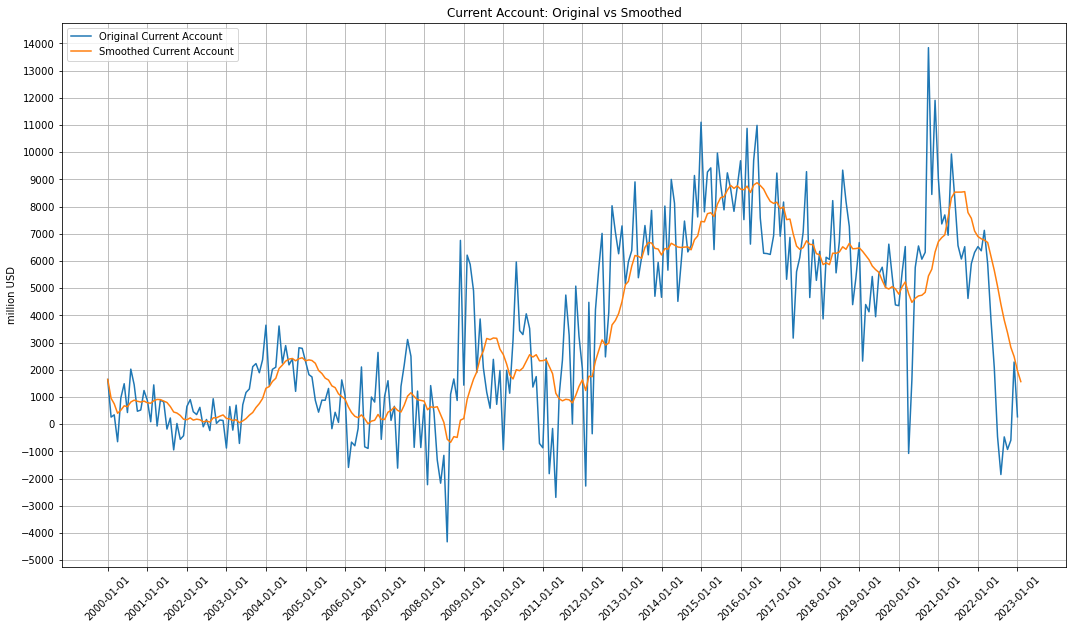

In [155]:
# your code here

# current account and its smoothed series in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["CA","CA_roll"]], label=["Original Current Account","Smoothed Current Account"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-5000,15000,1000)])
plt.ylabel('million USD')
plt.title('Current Account: Original vs Smoothed')
plt.legend()
plt.grid(True)

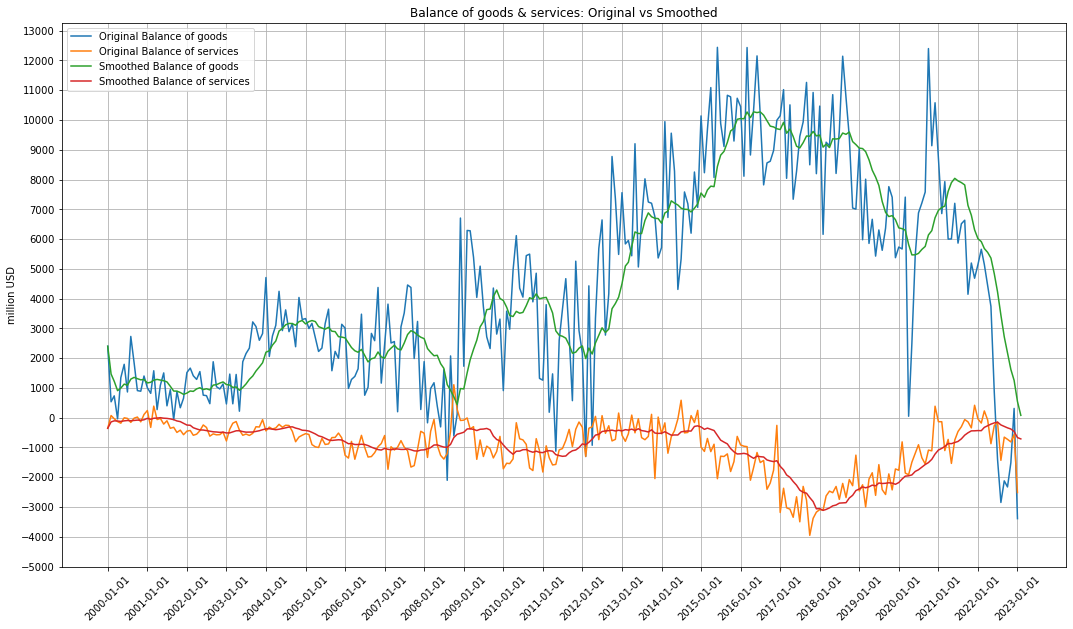

In [156]:
# your code here

# balance of goods, balance of services and their smoothed series in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["BOG","BOS","BOG_roll","BOS_roll"]], label=["Original Balance of goods","Original Balance of services","Smoothed Balance of goods","Smoothed Balance of services"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-5000,14000,1000)])
plt.ylabel('million USD')
plt.title('Balance of goods & services: Original vs Smoothed')
plt.legend()
plt.grid(True)

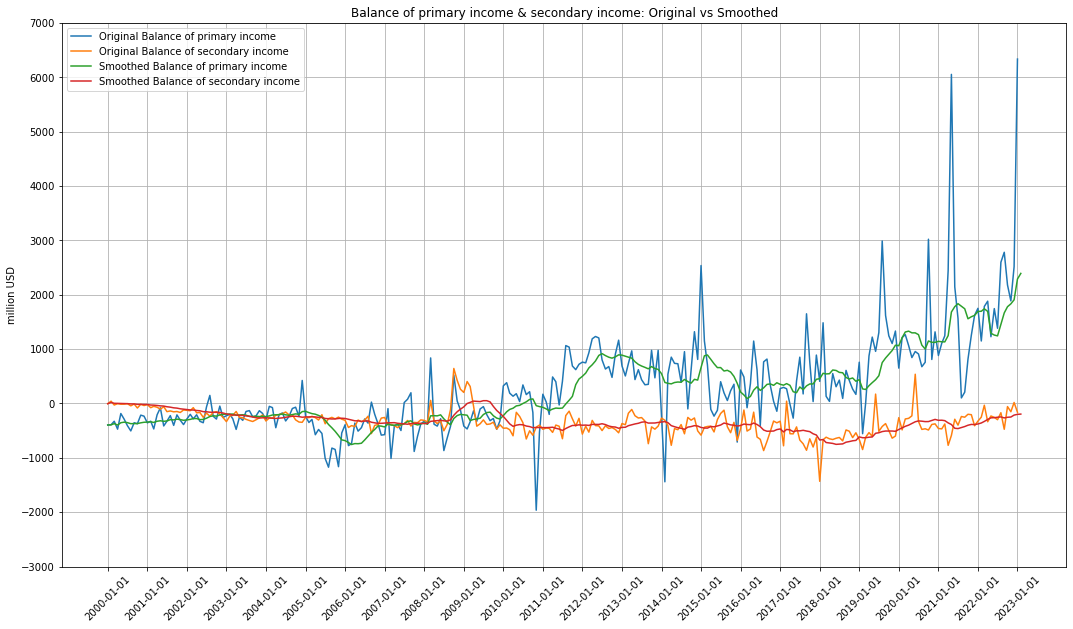

In [157]:
# your code here

# balance of primary income, balance of secondary income and their smoothed series in a graph
plt.figure(figsize=(18, 10))
plt.plot(df[["BOPI","BOSI","BOPI_roll","BOSI_roll"]], label=["Original Balance of primary income","Original Balance of secondary income","Smoothed Balance of primary income","Smoothed Balance of secondary income"])
plt.xticks([df.index[i] for i in range(0, df.index.size, 12)],rotation=45)
plt.yticks([i for i in range(-3000,8000,1000)])
plt.ylabel('million USD')
plt.title('Balance of primary income & secondary income: Original vs Smoothed')
plt.legend()
plt.grid(True)

## Q8. Statistical analysis

We want to conduct some statistical analysis on our data set. Some data are missing in some early months of the sample period. There was the global financial crisis in 2008 which had impacted the economy seriously. Also the pandemic shcok hit the economy so that irregular swings had occurred in several variables. We will consider these factors on our analysis.


#### Q8-1. Do the following.
- Restrict the sample period to 2001.01 to 2019.12.
- Show summary statistics of all variables.
- Compute the correlation coefficients across all variables.


In [158]:
# your code here

# Restrict the sample period to 2001.01 to 2019.12
df_sample = pd.DataFrame(df.iloc[12:240,:])
df_sample

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,...,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI,BOG_roll,BOS_roll,BOPI_roll,BOSI_roll,CA_roll
Month,,,,,,,,,,,,,,,,,,,,,
2001-01-01,5.25,5.990,7.760,11.650,1007.1,240.4,-357.1,-20.3,1272.82,1088.93,...,870.1,-780200.0,3.439221,0.000000,9.845529,1166.675000,-20.816667,-342.725000,-19.200000,783.933333
2001-02-01,5.00,5.430,6.790,11.640,817.6,-325.6,-326.6,-77.7,1252.44,1078.01,...,87.7,-83954.0,3.626670,-0.104696,9.288070,1190.258333,-54.033333,-337.350000,-29.191667,769.683333
2001-03-01,5.00,5.840,7.160,12.060,1576.3,388.4,-468.7,-52.7,1288.43,1061.62,...,1443.3,-889525.0,4.011944,0.104254,9.449299,1260.491667,-18.716667,-349.133333,-31.191667,861.450000
2001-04-01,5.00,6.590,7.910,12.620,271.8,-63.2,-208.3,-69.6,1325.55,1071.00,...,-69.3,-965216.0,4.833437,0.632493,9.419672,1286.416667,-13.141667,-327.091667,-36.691667,909.491667
2001-05-01,5.00,6.460,7.700,12.240,1089.8,-24.1,-80.1,-105.5,1298.46,1065.38,...,880.1,155061.0,5.263411,1.474814,10.408419,1265.025000,0.291667,-318.350000,-44.350000,902.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.50,1.164,1.689,7.791,5622.6,-2417.5,2988.8,-423.5,1208.98,1137.45,...,5770.4,-1629050.0,-0.037200,1.384145,-0.489727,7261.108333,-2211.033333,751.650000,-516.958333,5284.766667
2019-09-01,1.50,1.287,1.792,7.894,6364.8,-2579.7,1618.9,-370.6,1197.55,1115.69,...,5033.4,1836618.0,-0.426058,0.450576,-0.665867,6896.458333,-2202.558333,835.850000,-507.250000,5022.500000
2019-10-01,1.25,1.357,1.861,7.970,7761.4,-1888.2,1243.8,-499.0,1184.13,1094.19,...,6618.0,3003893.0,0.000000,-0.016316,-0.710556,6756.700000,-2186.650000,904.375000,-506.275000,4968.150000


In [159]:
# your code here

# Show summary statistics of all variables
df_sample.describe()

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,...,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI,BOG_roll,BOS_roll,BOPI_roll,BOSI_roll,CA_roll
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2.950658,3.594259,4.324136,9.270254,4673.441228,-1027.723246,114.329825,-358.609211,1126.014123,1076.406053,...,3401.438596,1.371132e+06,2.427907,3.884556,4.195156,4550.324854,-976.716594,73.434539,-347.689985,3299.352814
std,1.214827,1.443728,1.718281,1.228693,3433.719192,878.941794,642.980998,229.577607,104.914220,184.650541,...,3317.591514,3.789960e+06,1.277337,4.330509,5.085730,3134.118008,751.010158,444.710345,168.447464,2928.992222
min,1.250000,1.164000,1.645000,7.720000,-2103.600000,-3952.400000,-1963.800000,-1432.100000,915.860000,755.570000,...,-4327.200000,-2.741898e+07,-0.426058,-2.469901,-5.351737,442.883333,-3114.333333,-755.883333,-752.325000,-669.558333
25%,1.750000,2.186250,2.743000,8.337750,1841.075000,-1407.925000,-320.250000,-482.925000,1066.362500,974.205000,...,726.375000,-1.367762e+05,1.421610,1.296273,0.450889,2188.391667,-1161.379167,-276.883333,-441.731250,741.306250
50%,3.000000,3.695000,4.405000,8.866500,3853.400000,-787.700000,-50.850000,-355.100000,1130.560000,1026.175000,...,2484.650000,1.313508e+06,2.391847,2.655557,3.668134,3195.825000,-771.275000,-94.987500,-365.737500,2318.741667
75%,4.000000,4.822500,5.500000,10.102500,7370.700000,-433.025000,510.100000,-248.100000,1180.337500,1138.615000,...,6217.725000,2.914195e+06,3.379559,5.058583,6.137737,7220.927083,-433.987500,438.756250,-252.306250,6367.262500
max,5.250000,6.590000,8.560000,12.620000,12440.400000,1108.000000,2988.800000,643.700000,1461.980000,1546.110000,...,11101.500000,1.428829e+07,5.903960,17.676755,19.314590,10272.566667,0.291667,1071.341667,51.083333,8876.666667


In [160]:
# your code here

# Compute the correlation coefficients across all variables
df_sample.corr()

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,...,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI,BOG_roll,BOS_roll,BOPI_roll,BOSI_roll,CA_roll
B_Rate,1.000000,0.902960,0.823368,0.234284,-0.807752,0.552294,-0.470635,0.454750,-0.177884,-0.251188,...,-0.749450,-0.092278,0.680902,0.511415,0.335882,-0.848269,0.534950,-0.675056,0.531438,-0.842442
GBY,0.902960,1.000000,0.952427,0.526533,-0.839670,0.523530,-0.577791,0.487501,0.013960,-0.132808,...,-0.808608,-0.003429,0.722507,0.526877,0.386094,-0.895282,0.549779,-0.796496,0.692755,-0.898107
CBY_A,0.823368,0.952427,1.000000,0.676622,-0.813351,0.538542,-0.544968,0.591608,0.206858,0.047263,...,-0.763824,-0.062177,0.776144,0.453089,0.353275,-0.894542,0.536367,-0.769107,0.747694,-0.893436
CBY_B,0.234284,0.526533,0.676622,1.000000,-0.453499,0.343082,-0.219074,0.409141,0.607708,0.587014,...,-0.392626,0.027150,0.568488,0.088467,0.394039,-0.529960,0.347687,-0.344130,0.598644,-0.495747
BOG,-0.807752,-0.839670,-0.813351,-0.453499,1.000000,-0.489439,0.405983,-0.473364,-0.014763,-0.055156,...,0.951261,0.023983,-0.709699,-0.419880,-0.318513,0.885917,-0.487589,0.679997,-0.589171,0.892301
BOS,0.552294,0.523530,0.538542,0.343082,-0.489439,1.000000,-0.238365,0.582964,0.187033,0.185198,...,-0.247494,-0.128535,0.407641,0.189945,0.281788,-0.637224,0.832257,-0.270812,0.614108,-0.474255
BOPI,-0.470635,-0.577791,-0.544968,-0.219074,0.405983,-0.238365,1.000000,-0.273011,0.071108,0.267767,...,0.531960,-0.078882,-0.429573,-0.247795,-0.025473,0.438210,-0.307469,0.703487,-0.458350,0.470513
BOSI,0.454750,0.487501,0.591608,0.409141,-0.473364,0.582964,-0.273011,1.000000,0.406041,0.141133,...,-0.319198,-0.277136,0.470214,0.204310,0.162856,-0.562650,0.564907,-0.395452,0.647383,-0.480019
Won_Dollar,-0.177884,0.013960,0.206858,0.607708,-0.014763,0.187033,0.071108,0.406041,1.000000,0.535656,...,0.076150,-0.071664,0.172203,0.066156,0.215167,-0.106749,0.199497,0.061543,0.441894,-0.028315
Won_Yen,-0.251188,-0.132808,0.047263,0.587014,-0.055156,0.185198,0.267767,0.141133,0.535656,1.000000,...,0.053641,0.009978,0.224626,-0.248657,0.141040,-0.140960,0.117012,0.264936,0.125042,-0.073413


#### Q8-2. Do the following to split the sample into two subsaples, i.e., before and after of the global financial crisis. 

  - Create a new variable to identify whether the month is before or after 2009.01 that we assume the critical month to separate the dataset.
  - Split the dataset using `groupby` with the variable that you created above.
  - Show the sample sizes of the two subgroups.


In [161]:
# your code here

# Create a new variable to identify whether the month is before or after 2009.01
# new variable: split / before 2009.01: 0 / after 2009.01: 1
df_sample["split"] = [0 if i < 96 else 1 for i in range(0,228)]

In [162]:
# your code here

# Split the dataset using groupby with the variable
df_group = df_sample.groupby("split")

In [163]:
# your code here

# Show the sample sizes of the two subgroups
df_group.size()

split
0     96
1    132
dtype: int64

#### Q8-3. Conduct the following statistical analysis on each subgroup.

  - Show the values at 75% quantile of all variables for each subgroup of the dataset.
  - Compute the correlation coefficients across all variables for each subgroup.
  - for each group, find the variable that is most closely related (positively or negatively) with the BOK base rate
  - for each group, find the variable that is most closely related (positively or negatively) with the USD exchange rate
  - for each group, find the variable that is most closely related (positively or negatively) with the house price inflatioin rate


In [164]:
# your code here

# Show the values at 75% quantile of all variables for each subgroup of the dataset
df_group.quantile(0.75)

,B_Rate,GBY,CBY_A,CBY_B,BOG,BOS,BOPI,BOSI,Won_Dollar,Won_Yen,...,CA,FR_change,YoY_CPI,YoY_HPI,YoY_HJPI,BOG_roll,BOS_roll,BOPI_roll,BOSI_roll,CA_roll
split,,,,,,,,,,,,,,,,,,,,,
0,4.5,5.3900,6.6025,10.035,2997.825,-340.45,-199.325,-165.85,1214.800,1049.5200,...,1635.775,2805100.50,3.751487,9.697539,8.146187,2704.179167,-383.966667,-217.831250,-163.968750,1050.922917
1,2.5,3.4325,4.2425,10.150,9115.550,-577.95,774.350,-346.75,1165.745,1333.4175,...,7292.850,3201546.75,2.532715,3.038216,6.014734,9240.572917,-469.747917,629.129167,-385.952083,6664.789583


In [165]:
# your code here

# Compute the correlation coefficients across all variables for each subgroup
df_group.corr()

B_Rate       GBY     CBY_A     CBY_B       BOG  \
split                                                                  
0     B_Rate        1.000000  0.707219  0.554723  0.163171 -0.431608   
      GBY           0.707219  1.000000  0.805284  0.595615 -0.484461   
      CBY_A         0.554723  0.805284  1.000000  0.823300 -0.443978   
      CBY_B         0.163171  0.595615  0.823300  1.000000 -0.284456   
      BOG          -0.431608 -0.484461 -0.443978 -0.284456  1.000000   
      BOS          -0.101584  0.091497  0.396233  0.612033 -0.161411   
      BOPI          0.088761 -0.020799  0.155094  0.159140 -0.002153   
      BOSI         -0.040434  0.162560  0.572338  0.664881 -0.204787   
      Won_Dollar   -0.129280  0.253124  0.543932  0.817160 -0.246858   
      Won_Yen      -0.263210 -0.066404  0.427786  0.679361 -0.064136   
      CS           -0.540468 -0.153145 -0.042909  0.531757  0.161749   
      KOSPI_change -0.194638 -0.075433 -0.158628 -0.071663  0.189328   
      CA           -0.421755 -0.411518 -0.196587  0.030853  0.863240   
      FR_change    -0.253581 -0.252424 -0.477048 -0.308456  0.366160   
      YoY_CPI       0.304465  0.164781  0.419720  0.431566 -0.315908   
      YoY_HPI       0.217553  0.467692  0.285822  0.088451 -0.228730   
      YoY_HJPI      0.437474  0.778310  0.642154  0.532634 -0.463757   
      BOG_roll     -0.335882 -0.558741 -0.730045 -0.622301  0.539644   
      BOS_roll     -0.284680  0.043549  0.222181  0.672845 -0.120728   
      BOPI_roll    -0.164970 -0.192307  0.037733  0.235973  0.044117   
      BOSI_roll    -0.070050  0.309483  0.505463  0.816795 -0.296707   
      CA_roll      -0.528839 -0.584483 -0.622830 -0.231822  0.503128   
1     B_Rate        1.000000  0.681267  0.562657  0.453438 -0.680271   
      GBY           0.681267  1.000000  0.946771  0.929696 -0.742289   
      CBY_A         0.562657  0.946771  1.000000  0.979221 -0.709259   
      CBY_B         0.453438  0.929696  0.979221  1.000000 -0.687252   
      BOG          -0.680271 -0.742289 -0.709259 -0.687252  1.000000   
      BOS           0.643449  0.460752  0.410170  0.278090 -0.350135   
      BOPI          0.055115 -0.293133 -0.337980 -0.367133  0.025955   
      BOSI          0.247418  0.268712  0.372768  0.300492 -0.275491   
      Won_Dollar   -0.197359  0.170852  0.403036  0.423961 -0.122632   
      Won_Yen       0.690349  0.759378  0.791261  0.748502 -0.747262   
      CS           -0.604068 -0.219457 -0.244917 -0.043207  0.208462   
      KOSPI_change -0.033291  0.134481  0.181867  0.198747 -0.133004   
      CA           -0.468104 -0.668409 -0.652256 -0.685351  0.917841   
      FR_change     0.069359  0.320611  0.313105  0.341058 -0.186833   
      YoY_CPI       0.559854  0.738064  0.762958  0.772300 -0.624730   
      YoY_HPI       0.265479  0.032642  0.016532  0.024428 -0.171116   
      YoY_HJPI      0.732771  0.441412  0.296602  0.239987 -0.455386   
      BOG_roll     -0.796975 -0.867951 -0.856826 -0.793193  0.809746   
      BOS_roll      0.563412  0.481018  0.418285  0.293655 -0.321351   
      BOPI_roll    -0.001364 -0.540434 -0.625703 -0.712421  0.372585   
      BOSI_roll     0.256096  0.597365  0.665537  0.628859 -0.376094   
      CA_roll      -0.683607 -0.842852 -0.858874 -0.844250  0.822985   

                         BOS      BOPI      BOSI  Won_Dollar   Won_Yen  ...  \
split                                                                   ...   
0     B_Rate       -0.101584  0.088761 -0.040434   -0.129280 -0.263210  ...   
      GBY           0.091497 -0.020799  0.162560    0.253124 -0.066404  ...   
      CBY_A         0.396233  0.155094  0.572338    0.543932  0.427786  ...   
      CBY_B         0.612033  0.159140  0.664881    0.817160  0.679361  ...   
      BOG          -0.161411 -0.002153 -0.204787   -0.246858 -0.064136  ...   
      BOS           1.000000  0.295015  0.755651    0.736575  0.750565  ...   
      BOPI          0.295015  1.000000  0.379843    0.289254  0.359670  ...  

In [166]:
# your code here

# for each group, find the variable that is most closely related with the BOK base rate

# former group(before 2009.01): Government Bond Yields
print("Before 2009.01: "+ df_group.get_group(0).corr()['B_Rate'].drop(['B_Rate','split']).abs().idxmax())

# latter group(after 2009.01): 12 month rolling means on balances of goods
print("After 2009.01: "+ df_group.get_group(1).corr()['B_Rate'].drop(['B_Rate','split']).abs().idxmax())

Before 2009.01: GBY
After 2009.01: BOG_roll


In [167]:
# your code here

# for each group, find the variable that is most closely related with the USD exchange rate

# former group(before 2009.01): 12 month rolling means on balances of secondary income
print("Before 2009.01: "+ df_group.get_group(0).corr()['Won_Dollar'].drop(['Won_Dollar','split']).abs().idxmax())

# latter group(after 2009.01): 12 month rolling means on balances of secondary income
print("After 2009.01: "+ df_group.get_group(1).corr()['Won_Dollar'].drop(['Won_Dollar','split']).abs().idxmax())

Before 2009.01: BOSI_roll
After 2009.01: BOSI_roll


In [168]:
# your code here

# for each group, find the variable that is most closely related with the house price inflatioin rate

# former group(before 2009.01): YoY Inflation rate for jeonse price index
print("Before 2009.01: "+ df_group.get_group(0).corr()['YoY_HPI'].drop(['YoY_HPI','split']).abs().idxmax())

# latter group(after 2009.01): YoY Inflation rate for jeonse price index
print("After 2009.01: "+ df_group.get_group(1).corr()['YoY_HPI'].drop(['YoY_HPI','split']).abs().idxmax())

Before 2009.01: YoY_HJPI
After 2009.01: YoY_HJPI
